# Ocean Temperature Data Exploring

## Setup

Analysis and visualization was done using R and various packages. The following is the script used to generate 2 scatterplot graphs.

In [1]:
library(tidyverse)
library(lubridate) 
library(ggplot2)
library(plotly)
options(repr.plot.width=10, repr.plot.height=6)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



## Reading and Wrangling Data

Temperature data {cite}`Dewees2021` are found in the `"data"` folder, while coordinates (and the time recorded) are in the `"data/nav"` folder.

All of the temperature data was cleaned using a `Python` script, located in the `data_cleaning` folder. No packages were used, and can be used as long as a v3.9 Python is installed (anything above or below is untested) and the scripts are pointed to the right data sources.

- `data/temp_processed_summarized.csv`: mean temp over min
- `data/nav/nav_processed.csv`: mean GPS over min
- `data/nav_temp_joined_processed.csv`: joined mean temp & GPS over min

The dates are all of type `character`, meaning extracting any use without it being a proper `date` type is hard. Therefore, time and date must be formatted.

In [2]:
format_datetime <- function(df) {
  df_new <- df %>%
    # https://www.neonscience.org/resources/learning-hub/tutorials/dc-time-series-subset-dplyr-r
    mutate(date = as.Date(date, format = '%m/%d/%Y')) %>%
    # https://www.tidyverse.org/blog/2021/03/clock-0-1-0/
    mutate(datetime = as.POSIXct(date, "America/Vancouver")) %>%
    mutate(datetime = datetime +hour(time)+ minute(time))
  
  return(df_new)
}

The following are all of the functions needed to clean up 1 temperature file. However, we have quite a few files, and trying to clean and instantiate each by hand is cumbersome. Therefore, we will iterate through all of the files and summarize.

```{attention}
Please keep in mind that the following code blocks will take pretty long to run.
```

In [3]:
clean_SBE45_data <- function(x) {
  read <- read_delim(x, delim = ",", 
                     col_names = c("date", 
                                    "time", 
                                    "int_temp", 
                                    "conductivity",
                                    "salinity",
                                    "sound_vel",
                                    "ext_temp"),
                    col_types = cols(
                      date = col_character(),
                      time = col_time(format = ""),
                      int_temp = col_double(),
                      conductivity = col_double(),
                      salinity = col_double(),
                      sound_vel = col_double(),
                      ext_temp = col_double()
                    )) %>%
    select(date, time, ext_temp)
  return(read)
}

In [4]:
clean_STT_TSG_data <- function(x) {
  read <- read_delim(x, delim = ",",
                     col_names = c("date",
                                   "time",
                                   "type",
                                   "diff",
                                   "ext_temp",
                                   "int_temp",
                                  "extra")
                    ) %>%
    select(date, time)    
  return(read)
}

In [5]:
clean_temp_data <- function(x) {
  # https://stackoverflow.com/questions/10128617/test-if-characters-are-in-a-string
  if(grepl("SBE45-TSG-MSG", x, fixed = TRUE)) {
    return(clean_SBE45_data(x))
  } else {
    return(clean_STT_TSG_data(x))
  }
}

This is the data before it is summarized by the minute.

In [6]:
# https://stackoverflow.com/questions/11433432/how-to-import-multiple-csv-files-at-once
all_temperature_loaded <- list.files(path = "data/",
             pattern = "*.Raw",
             full.names = T) %>%
  map_df(~clean_temp_data(.))

Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  diff = col_double(),
  ext_temp = col_double(),
  int_temp = col_double(),
  extra = col_logical()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  diff = col_double(),
  ext_temp = col_double(),
  int_temp = col_double(),
  extra = col_logical()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  diff = col_double(),
  ext_temp = col_double(),
  int_temp = col_double(),
  extra = col_logical()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  diff = col_double(),
  ext_temp = col_double(),
  int_temp = col_double(),
  extra = col_logical()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format =

Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  diff = col_double(),
  ext_temp = col_double(),
  int_temp = col_double(),
  extra = col_logical()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  diff = col_double(),
  ext_temp = col_double(),
  int_temp = col_double(),
  extra = col_logical()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  diff = col_double(),
  ext_temp = col_double(),
  int_temp = col_double(),
  extra = col_logical()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  diff = col_double(),
  ext_temp = col_double(),
  int_temp = col_double(),
  extra = col_logical()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format =

In [7]:
head(all_temperature_loaded)
summary(all_temperature_loaded)

date       time     ext_temp
1 06/13/2021 19:42:03 19.5731 
2 06/13/2021 19:42:04 19.5240 
3 06/13/2021 19:42:05 19.4795 
4 06/13/2021 19:42:06 19.4724 
5 06/13/2021 19:42:07 19.4734 
6 06/13/2021 19:42:08 19.4718

     date               time             ext_temp      
 Length:7267565     Length:7267565    Min.   : 0       
 Class :character   Class1:hms        1st Qu.:13       
 Mode  :character   Class2:difftime   Median :15       
                    Mode  :numeric    Mean   :15       
                                      3rd Qu.:17       
                                      Max.   :24       
                                      NA's   :3687228  

In [8]:
all_temperature_cleaned <- all_temperature_loaded %>%
  filter(!is.na(ext_temp)) %>%
  filter(ext_temp > 2) %>%
  format_datetime()

all_temperature <- group_by(all_temperature_cleaned, datetime) %>%
    summarize(mean_ext = mean(ext_temp, na.rm = TRUE))

write_csv(all_temperature, "data/temp_processed_summarized.csv")

In [9]:
head(all_temperature)
summary(all_temperature)

datetime            mean_ext
1 2021-06-12 17:00:20 19.05565
2 2021-06-12 17:00:21 18.62864
3 2021-06-12 17:00:22 19.00354
4 2021-06-12 17:00:23 19.09503
5 2021-06-12 17:00:24 19.17977
6 2021-06-12 17:00:25 19.10705

    datetime                      mean_ext     
 Min.   :2021-06-12 17:00:20   Min.   : 9.618  
 1st Qu.:2021-06-23 17:00:13   1st Qu.:13.096  
 Median :2021-07-04 17:00:06   Median :14.771  
 Mean   :2021-07-04 07:00:13   Mean   :15.165  
 3rd Qu.:2021-07-15 11:00:20   3rd Qu.:16.586  
 Max.   :2021-07-25 17:01:16   Max.   :24.086  

All of the navigation files will also be cleaned up and summarized in similar manner to the temperature files.

In [10]:
clean_nav_data <- function(x) {
  read <- read_csv(x, 
                   col_names = c(
                     "date",
                     "time",
                     "type",
                     "time_num",
                     "lat",
                     "lat_NS",
                     "long",
                     "long_WE",
                     "gps_quality",
                     "num_sat_view",
                     "hort_dil",
                     "ant_alt",
                     "ant_alt_unit",
                     "geoidal",
                     "geoidal_unit",
                     "age_diff",
                     "diff_station"
                   )
                  ) %>%
    select(date, time, lat, long)
    return(read)
}

Below is the raw ocean navigation data.

In [11]:
all_nav_loaded <- list.files(path = "data/nav/",
                      pattern = "*.Raw",
                      full.names = T) %>%
  map_df(~clean_nav_data(.)) %>%
  format_datetime()

Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  time_num = col_double(),
  lat = col_double(),
  lat_NS = col_character(),
  long = col_double(),
  long_WE = col_character(),
  gps_quality = col_double(),
  num_sat_view = col_double(),
  hort_dil = col_double(),
  ant_alt = col_double(),
  ant_alt_unit = col_character(),
  geoidal = col_logical(),
  geoidal_unit = col_character(),
  age_diff = col_logical(),
  diff_station = col_character()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  time_num = col_double(),
  lat = col_double(),
  lat_NS = col_character(),
  long = col_double(),
  long_WE = col_character(),
  gps_quality = col_double(),
  num_sat_view = col_double(),
  hort_dil = col_double(),
  ant_alt = col_double(),
  ant_alt_unit = col_character(),
  geoidal = col_logical(),
  geoidal_unit = col_character(),
  age_diff = 

Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  time_num = col_character(),
  lat = col_double(),
  lat_NS = col_character(),
  long = col_double(),
  long_WE = col_character(),
  gps_quality = col_double(),
  num_sat_view = col_double(),
  hort_dil = col_double(),
  ant_alt = col_double(),
  ant_alt_unit = col_character(),
  geoidal = col_logical(),
  geoidal_unit = col_character(),
  age_diff = col_logical(),
  diff_station = col_character()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  time_num = col_character(),
  lat = col_double(),
  lat_NS = col_character(),
  long = col_double(),
  long_WE = col_character(),
  gps_quality = col_double(),
  num_sat_view = col_double(),
  hort_dil = col_double(),
  ant_alt = col_double(),
  ant_alt_unit = col_character(),
  geoidal = col_logical(),
  geoidal_unit = col_character(),
  age_d

Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  time_num = col_character(),
  lat = col_double(),
  lat_NS = col_character(),
  long = col_double(),
  long_WE = col_character(),
  gps_quality = col_double(),
  num_sat_view = col_double(),
  hort_dil = col_double(),
  ant_alt = col_double(),
  ant_alt_unit = col_character(),
  geoidal = col_logical(),
  geoidal_unit = col_character(),
  age_diff = col_logical(),
  diff_station = col_character()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  time_num = col_character(),
  lat = col_double(),
  lat_NS = col_character(),
  long = col_double(),
  long_WE = col_character(),
  gps_quality = col_double(),
  num_sat_view = col_double(),
  hort_dil = col_double(),
  ant_alt = col_double(),
  ant_alt_unit = col_character(),
  geoidal = col_logical(),
  geoidal_unit = col_character(),
  age_d

Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  time_num = col_character(),
  lat = col_double(),
  lat_NS = col_character(),
  long = col_double(),
  long_WE = col_character(),
  gps_quality = col_double(),
  num_sat_view = col_double(),
  hort_dil = col_double(),
  ant_alt = col_double(),
  ant_alt_unit = col_character(),
  geoidal = col_logical(),
  geoidal_unit = col_character(),
  age_diff = col_logical(),
  diff_station = col_character()
)
Parsed with column specification:
cols(
  date = col_character(),
  time = col_time(format = ""),
  type = col_character(),
  time_num = col_character(),
  lat = col_double(),
  lat_NS = col_character(),
  long = col_double(),
  long_WE = col_character(),
  gps_quality = col_double(),
  num_sat_view = col_double(),
  hort_dil = col_double(),
  ant_alt = col_double(),
  ant_alt_unit = col_character(),
  geoidal = col_logical(),
  geoidal_unit = col_character(),
  age_d

In [12]:
summary(all_nav_loaded)

      date                time               lat            long      
 Min.   :2021-06-13   Length:3722834    Min.   :3132   Min.   :11709  
 1st Qu.:2021-06-24   Class1:hms        1st Qu.:3341   1st Qu.:12045  
 Median :2021-07-05   Class2:difftime   Median :3750   Median :12310  
 Mean   :2021-07-04   Mode  :numeric    Mean   :3922   Mean   :12285  
 3rd Qu.:2021-07-15                     3rd Qu.:4537   3rd Qu.:12456  
 Max.   :2021-07-26                     Max.   :5224   Max.   :13053  
    datetime                  
 Min.   :2021-06-12 17:00:16  
 1st Qu.:2021-06-23 17:00:37  
 Median :2021-07-04 17:00:24  
 Mean   :2021-07-04 09:56:25  
 3rd Qu.:2021-07-14 17:01:16  
 Max.   :2021-07-25 17:01:16  

Since the latitude and longitude are in the degree minutes format, they must be converted.

In [13]:
all_nav <- all_nav_loaded %>%
    group_by(datetime) %>%
    summarize(mean_lat = mean(lat), mean_long = mean(long)) %>%
    mutate(mean_lat = mean_lat/100, mean_long = mean_long/100) %>%
    mutate(deg_lat_int = trunc(mean_lat, 0),
           deg_long_int = trunc(mean_long, 0)) %>%
    mutate(deg_lat_dec = round((mean_lat - deg_lat_int) * 10000),
           deg_long_dec = round((mean_long - deg_long_int) * 10000)) %>%
    mutate(mean_deg_lat = deg_lat_int + deg_lat_dec/(60 * 100),
          mean_deg_long = deg_long_int + deg_long_dec / (60 * 100)) %>%
    select(-deg_lat_int, -deg_long_int, -deg_lat_dec, -deg_long_dec, -mean_lat, -mean_long)


write_csv(all_nav, "data/nav/nav_processed.csv")

In [14]:
head(all_nav)
summary(all_nav)

datetime            mean_deg_lat mean_deg_long
1 2021-06-12 17:00:16 32.69633     117.1570     
2 2021-06-12 17:00:17 32.69650     117.1568     
3 2021-06-12 17:00:18 32.69683     117.1563     
4 2021-06-12 17:00:19 32.69283     117.1755     
5 2021-06-12 17:00:20 32.67333     117.2213     
6 2021-06-12 17:00:21 32.66167     117.2897

    datetime                    mean_deg_lat   mean_deg_long  
 Min.   :2021-06-12 17:00:16   Min.   :31.54   Min.   :117.2  
 1st Qu.:2021-06-23 17:00:10   1st Qu.:33.71   1st Qu.:120.6  
 Median :2021-07-04 17:00:04   Median :37.83   Median :123.3  
 Mean   :2021-07-04 06:25:58   Mean   :39.40   Mean   :123.1  
 3rd Qu.:2021-07-14 17:01:21   3rd Qu.:45.25   3rd Qu.:125.0  
 Max.   :2021-07-25 17:01:16   Max.   :52.64   Max.   :130.8  

Since we have the date and time (by the minute) of both the temperature and it's coordinates, we can match the two columns.

In [15]:
joined_temp_nav <- inner_join(all_temperature, 
                             all_nav,
                             by = c("datetime" = "datetime"))

write_csv(joined_temp_nav, "data/nav_temp_joined_processed.csv")

In [16]:
head(joined_temp_nav)
summary(joined_temp_nav)

datetime            mean_ext mean_deg_lat mean_deg_long
1 2021-06-12 17:00:20 19.05565 32.67333     117.2213     
2 2021-06-12 17:00:21 18.62864 32.66167     117.2897     
3 2021-06-12 17:00:22 19.00354 32.65833     117.3313     
4 2021-06-12 17:00:23 19.09503 32.65250     117.3740     
5 2021-06-12 17:00:24 19.17977 32.65217     117.3750     
6 2021-06-12 17:00:25 19.10705 32.65183     117.3758

    datetime                      mean_ext       mean_deg_lat   mean_deg_long  
 Min.   :2021-06-12 17:00:20   Min.   : 9.618   Min.   :31.54   Min.   :117.2  
 1st Qu.:2021-06-23 17:00:13   1st Qu.:13.096   1st Qu.:33.74   1st Qu.:120.6  
 Median :2021-07-04 17:00:06   Median :14.771   Median :37.83   Median :123.4  
 Mean   :2021-07-04 07:00:13   Mean   :15.165   Mean   :39.41   Mean   :123.1  
 3rd Qu.:2021-07-15 11:00:20   3rd Qu.:16.586   3rd Qu.:45.25   3rd Qu.:125.0  
 Max.   :2021-07-25 17:01:16   Max.   :24.086   Max.   :52.64   Max.   :130.8  

## Visualizing the Data

Time and mean temperature plotted on a scatterplot to see temperature changes over time. Notice that since the ship moves in 1 way vs time, the shape of the 2D scatterplot and the 3D plot is very similar.

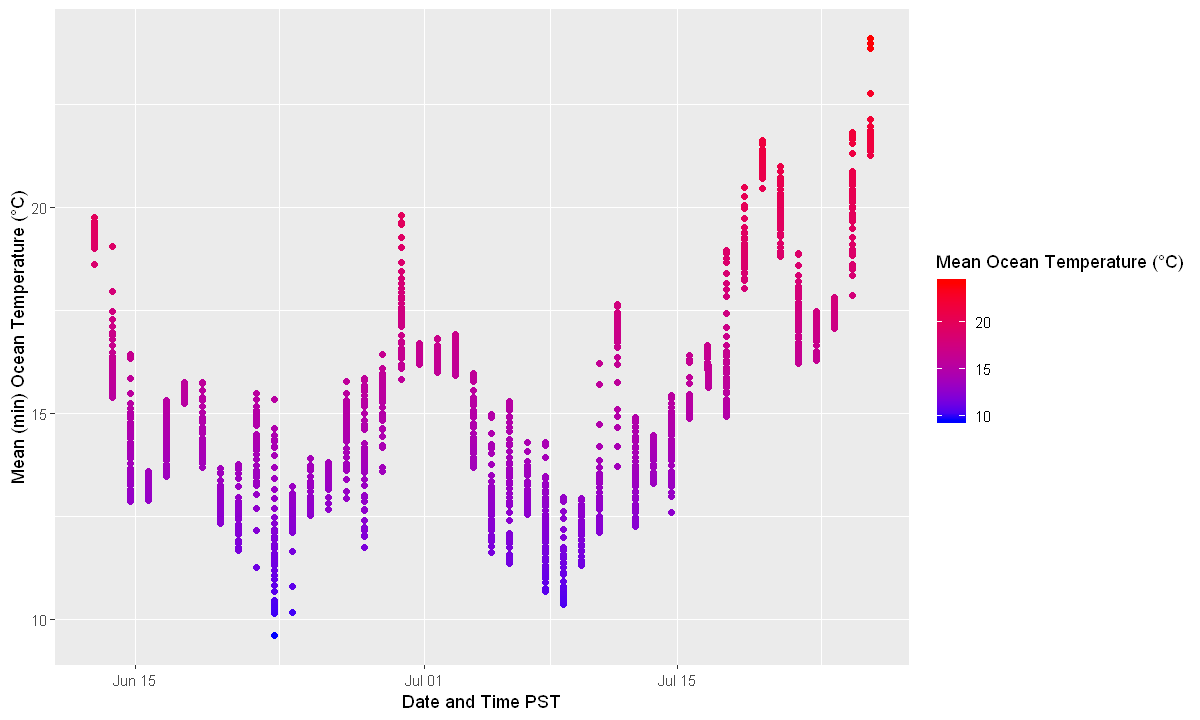

In [17]:
time_plot <- ggplot(all_temperature, aes(x = datetime, 
                                         y = mean_ext, 
                                         colour = mean_ext)) +
  geom_point() +
  scale_colour_gradient(low = "blue", high = "red") +
  labs(x = "Date and Time PST", 
       y = "Mean (min) Ocean Temperature (°C)",
       colour = "Mean Ocean Temperature (°C)")
time_plot

In [18]:
p<- plot_ly(joined_temp_nav, 
        x = ~mean_deg_lat, 
        y = ~mean_deg_long,
        z = ~mean_ext,  
        color = ~mean_ext
        ) %>%
    add_markers(size = 0.7) %>% 
    colorbar(title = "Mean Ocean Temp (°C)")%>%
    layout(title = "Mean Ocean Temperature and Coordinates",
           scene = list(
               xaxis = list(title = "Mean Latitude (°)"),
               yaxis = list(title = "Mean Longitude (°)"),
               zaxis = list(title = "Mean Ocean Temp (°C)")
               )
           )

In [19]:
embed_notebook(p)

<iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+DQo8aHRtbD4NCjxoZWFkPg0KPG1ldGEgY2hhcnNldD0idXRmLTgiIC8+DQo8dGl0bGU+cGxvdGx5PC90aXRsZT4NCjxzY3JpcHQgc3JjPSJkYXRhOmFwcGxpY2F0aW9uL2phdmFzY3JpcHQ7YmFzZTY0LEtHWjFibU4wYVc5dUtDa2dld29nSUM4dklFbG1JSGRwYm1SdmR5NUlWRTFNVjJsa1oyVjBjeUJwY3lCaGJISmxZV1I1SUdSbFptbHVaV1FzSUhSb1pXNGdkWE5sSUdsME95QnZkR2hsY25kcGMyVWdZM0psWVhSbElHRUtJQ0F2THlCdVpYY2diMkpxWldOMExpQlVhR2x6SUdGc2JHOTNjeUJ3Y21WalpXUnBibWNnWTI5a1pTQjBieUJ6WlhRZ2IzQjBhVzl1Y3lCMGFHRjBJR0ZtWm1WamRDQjBhR1VLSUNBdkx5QnBibWwwYVdGc2FYcGhkR2x2YmlCd2NtOWpaWE56SUNoMGFHOTFaMmdnYm05dVpTQmpkWEp5Wlc1MGJIa2daWGhwYzNRcExnb2dJSGRwYm1SdmR5NUlWRTFNVjJsa1oyVjBjeUE5SUhkcGJtUnZkeTVJVkUxTVYybGtaMlYwY3lCOGZDQjdmVHNLQ2lBZ0x5OGdVMlZsSUdsbUlIZGxKM0psSUhKMWJtNXBibWNnYVc0Z1lTQjJhV1YzWlhJZ2NHRnVaUzRnU1dZZ2JtOTBMQ0IzWlNkeVpTQnBiaUJoSUhkbFlpQmljbTkzYzJWeUxnb2dJSFpoY2lCMmFXVjNaWEpOYjJSbElEMGdkMmx1Wkc5M0xraFVUVXhYYVdSblpYUnpMblpwWlhkbGNrMXZaR1VnUFFvZ0lDQWdJQ0F2WEdKMmFXVjNaWEpmY0dGdVpUMHhYR0l2TG5SbGMzUW9kMmx1Wkc5M0xteHZZMkYwYVc5dUtUc0tDaUFnTHk4Z1UyVmxJR2xtSUhkbEozSmxJSEoxYm01cGJtY2dhVzRnVTJocGJua2diVzlrWlM0Z1NXWWdibTkwTENCcGRDZHpJR0VnYzNSaGRHbGpJR1J2WTNWdFpXNTBMZ29nSUM4dklFNXZkR1VnZEdoaGRDQnpkR0YwYVdNZ2QybGtaMlYwY3lCallXNGdZWEJ3WldGeUlHbHVJR0p2ZEdnZ1UyaHBibmtnWVc1a0lITjBZWFJwWXlCdGIyUmxjeXdnWW5WMENpQWdMeThnYjJKMmFXOTFjMng1TENCVGFHbHVlU0IzYVdSblpYUnpJR05oYmlCdmJteDVJR0Z3Y0dWaGNpQnBiaUJUYUdsdWVTQmhjSEJ6TDJSdlkzVnRaVzUwY3k0S0lDQjJZWElnYzJocGJubE5iMlJsSUQwZ2QybHVaRzkzTGtoVVRVeFhhV1JuWlhSekxuTm9hVzU1VFc5a1pTQTlDaUFnSUNBZ0lIUjVjR1Z2WmloM2FXNWtiM2N1VTJocGJua3BJQ0U5UFNBaWRXNWtaV1pwYm1Wa0lpQW1KaUFoSVhkcGJtUnZkeTVUYUdsdWVTNXZkWFJ3ZFhSQ2FXNWthVzVuY3pzS0NpQWdMeThnVjJVZ1kyRnVKM1FnWTI5MWJuUWdiMjRnYWxGMVpYSjVJR0psYVc1bklHRjJZV2xzWVdKc1pTd2djMjhnZDJVZ2FXMXdiR1Z0Wlc1MElHOTFjaUJ2ZDI0S0lDQXZMeUIyWlhKemFXOXVJR2xtSUc1bFkyVnpjMkZ5ZVM0S0lDQm1kVzVqZEdsdmJpQnhkV1Z5ZVZObGJHVmpkRzl5UVd4c0tITmpiM0JsTENCelpXeGxZM1J2Y2lrZ2V3b2dJQ0FnYVdZZ0tIUjVjR1Z2WmlocVVYVmxjbmtwSUNFOVBTQWlkVzVrWldacGJtVmtJaUFtSmlCelkyOXdaU0JwYm5OMFlXNWpaVzltSUdwUmRXVnllU2tnZXdvZ0lDQWdJQ0J5WlhSMWNtNGdjMk52Y0dVdVptbHVaQ2h6Wld4bFkzUnZjaWs3Q2lBZ0lDQjlDaUFnSUNCcFppQW9jMk52Y0dVdWNYVmxjbmxUWld4bFkzUnZja0ZzYkNrZ2V3b2dJQ0FnSUNCeVpYUjFjbTRnYzJOdmNHVXVjWFZsY25sVFpXeGxZM1J2Y2tGc2JDaHpaV3hsWTNSdmNpazdDaUFnSUNCOUNpQWdmUW9LSUNCbWRXNWpkR2x2YmlCaGMwRnljbUY1S0haaGJIVmxLU0I3Q2lBZ0lDQnBaaUFvZG1Gc2RXVWdQVDA5SUc1MWJHd3BDaUFnSUNBZ0lISmxkSFZ5YmlCYlhUc0tJQ0FnSUdsbUlDZ2tMbWx6UVhKeVlYa29kbUZzZFdVcEtRb2dJQ0FnSUNCeVpYUjFjbTRnZG1Gc2RXVTdDaUFnSUNCeVpYUjFjbTRnVzNaaGJIVmxYVHNLSUNCOUNnb2dJQzh2SUVsdGNHeGxiV1Z1ZENCcVVYVmxjbmtuY3lCbGVIUmxibVFLSUNCbWRXNWpkR2x2YmlCbGVIUmxibVFvZEdGeVoyVjBJQzhxTENBdUxpNGdLaThwSUhzS0lDQWdJR2xtSUNoaGNtZDFiV1Z1ZEhNdWJHVnVaM1JvSUQwOUlERXBJSHNLSUNBZ0lDQWdjbVYwZFhKdUlIUmhjbWRsZERzS0lDQWdJSDBLSUNBZ0lHWnZjaUFvZG1GeUlHa2dQU0F4T3lCcElEd2dZWEpuZFcxbGJuUnpMbXhsYm1kMGFEc2dhU3NyS1NCN0NpQWdJQ0FnSUhaaGNpQnpiM1Z5WTJVZ1BTQmhjbWQxYldWdWRITmJhVjA3Q2lBZ0lDQWdJR1p2Y2lBb2RtRnlJSEJ5YjNBZ2FXNGdjMjkxY21ObEtTQjdDaUFnSUNBZ0lDQWdhV1lnS0hOdmRYSmpaUzVvWVhOUGQyNVFjbTl3WlhKMGVTaHdjbTl3S1NrZ2V3b2dJQ0FnSUNBZ0lDQWdkR0Z5WjJWMFczQnliM0JkSUQwZ2MyOTFjbU5sVzNCeWIzQmRPd29nSUNBZ0lDQWdJSDBLSUNBZ0lDQWdmUW9nSUNBZ2ZRb2dJQ0FnY21WMGRYSnVJSFJoY21kbGREc0tJQ0I5Q2dvZ0lDOHZJRWxGT0NCa2IyVnpiaWQwSUhOMWNIQnZjblFnUVhKeVlYa3VabTl5UldGamFDNEtJQ0JtZFc1amRHbHZiaUJtYjNKRllXTm9LSFpoYkhWbGN5d2dZMkZzYkdKaFkyc3NJSFJvYVhOQmNtY3BJSHNLSUNBZ0lHbG1JQ2gyWVd4MVpYTXVabTl5UldGamFDa2dld29nSUNBZ0lDQjJZV3gxWlhNdVptOXlSV0ZqYUNoallXeHNZbUZqYXl3Z2RHaHBjMEZ5WnlrN0NpQWdJQ0I5SUdWc2MyVWdld29nSUNBZ0lDQm1iM0lnS0haaGNpQnBJRDBnTURzZ2FTQThJSFpoYkhWbGN5NXNaVzVuZEdnN0lHa3JLeWtnZXdvZ0lDQWdJQ0FnSUdOaGJHeGlZV05yTG1OaGJHd29kR2hwYzBGeVp5d2dkbUZzZFdWelcybGRMQ0JwTENCMllXeDFaWE1wT3dvZ0lDQWdJQ0I5Q2lBZ0lDQjlDaUFnZlFvS0lDQXZMeUJTWlhCc1lXTmxjeUIwYUdVZ2MzQmxZMmxtYVdWa0lHMWxkR2h2WkNCM2FYUm9JSFJvWlNCeVpYUjFjbTRnZG1Gc2RXVWdiMllnWm5WdVkxTnZkWEpqWlM0S0lDQXZMd29nSUM4dklFNXZkR1VnZEdoaGRDQm1kVzVqVTI5MWNtTmxJSE5vYjNWc1pDQnViM1FnUWtVZ2RHaGxJRzVsZHlCdFpYUm9iMlFzSUdsMElITm9iM1ZzWkNCaVpTQmhJR1oxYm1OMGFXOXVDaUFnTHk4Z2RHaGhkQ0JTUlZSVlV